## Librerías

In [20]:
import numpy as np
import pandas as pd
pd.options.display.max_rows=5
pd.options.display.max_columns=6
import os
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
%matplotlib inline
#plt.rcParams["figure.figsize"] = (10,10)
#sns.set_context("paper")
sns.set()
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Cargar Datos

In [3]:
try:
  	os.chdir(os.path.join(os.getcwd(), '../../'))
  	print(os.getcwd())
except:
 	pass

/home/tao/Documents/uba/met3/201902/met4op


In [22]:
df_in = pd.read_csv('dataset/elecciones_2019/resultados/120819-054029/datos_agrup.csv')

## Acomodarlos

In [23]:
df_in = (
    df_in
    .loc[df_in.CODIGO_CATEGORIA == 100000000000]
    .filter(["NOMBRE_AGRUPACION", "VOTOS_AGRUPACION",
             "NOMBRE_REGION","CODIGO_CIRCUITO","CODIGO_MESA"])
    .pivot_table(
        values='VOTOS_AGRUPACION', 
        index=['NOMBRE_REGION',"CODIGO_CIRCUITO","CODIGO_MESA"], 
        columns=['NOMBRE_AGRUPACION'])
)

df_in.reset_index(level=['NOMBRE_REGION',"CODIGO_CIRCUITO","CODIGO_MESA"], inplace=True)
df_in = df_in.loc[(df_in["JUNTOS POR EL CAMBIO"] + df_in["JUNTOS POR EL CAMBIO"] )>0]

df_in = df_in.rename_axis('index')

df_in

NOMBRE_AGRUPACION NOMBRE_REGION  CODIGO_CIRCUITO  CODIGO_MESA  ...  \
index                                                          ...   
0                     COMUNA 01       1001000001  0100100001X  ...   
1                     COMUNA 01       1001000001  0100100002X  ...   
...                         ...              ...          ...  ...   
7407                  COMUNA 15       1015000167  0101507412X  ...   
7408                  COMUNA 15       1015000167  0101507413X  ...   

NOMBRE_AGRUPACION  PARTIDO AUTONOMISTA  RECURRIDO  \
index                                               
0                                    0          0   
1                                    0          0   
...                                ...        ...   
7407                                 0          0   
7408                                 2          0   

NOMBRE_AGRUPACION  UNITE POR LA LIBERTAD Y LA DIGNIDAD  
index                                                   
0                                                    4  
1                                                    9  
...                                                ...  
7407                                                10  
7408                                                10  

[7353 rows x 17 columns]

## Gráficos

### Histogramas

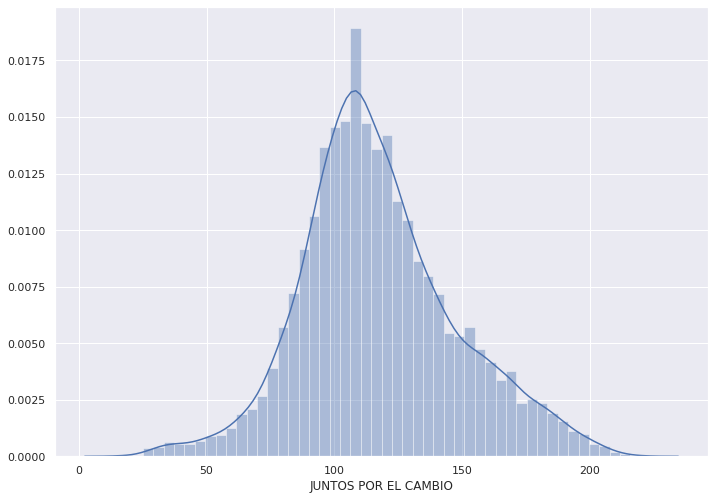

In [6]:
sns.distplot(df_in["JUNTOS POR EL CAMBIO"])

### Boxplots

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/500px-Boxplot_vs_PDF.svg.png)

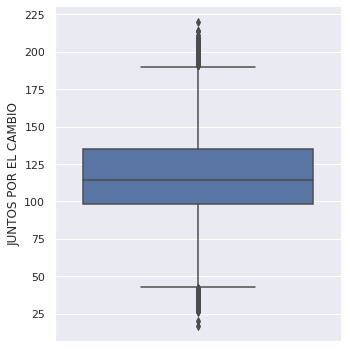

In [7]:
plt.rcParams["figure.figsize"] = (10,10)
sns.catplot(y="JUNTOS POR EL CAMBIO",
            data=df_in,
            kind="box")

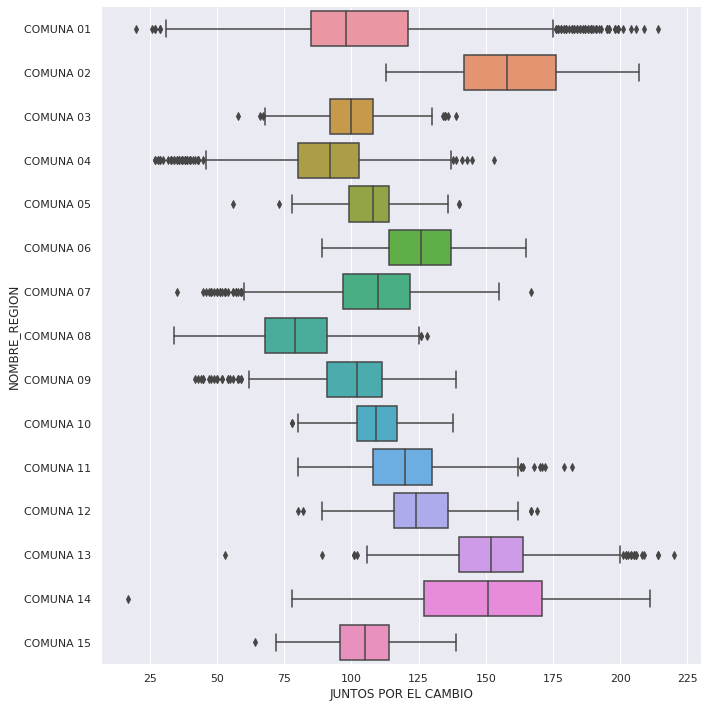

In [8]:
sns.catplot(x="JUNTOS POR EL CAMBIO", 
            y="NOMBRE_REGION", 
            data=df_in, 
            kind="box",
            height=10, aspect=1)


### Gŕafico de Barras

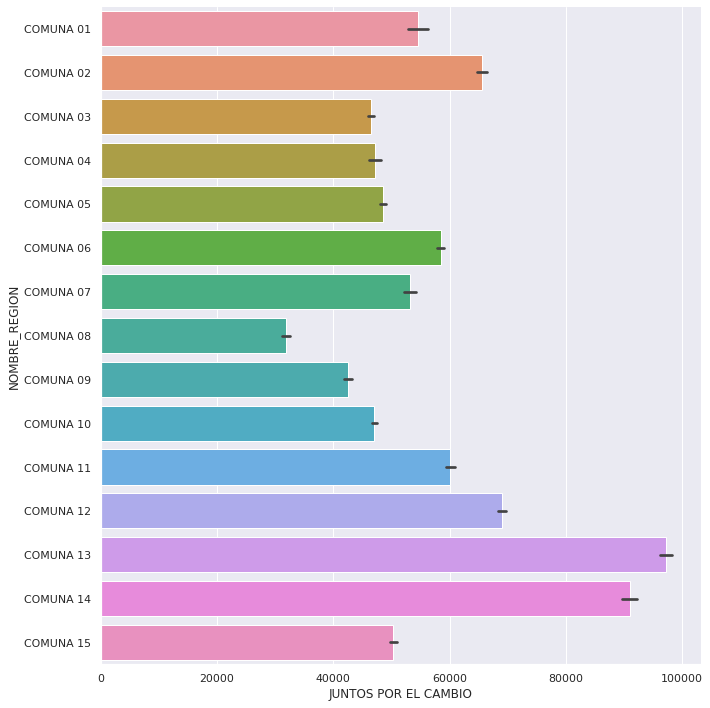

In [9]:
sns.catplot(x="JUNTOS POR EL CAMBIO", 
            y="NOMBRE_REGION",
            data=df_in,
            kind="bar",
            estimator=np.sum, 
             height=10, aspect=1)

### Scatterplots

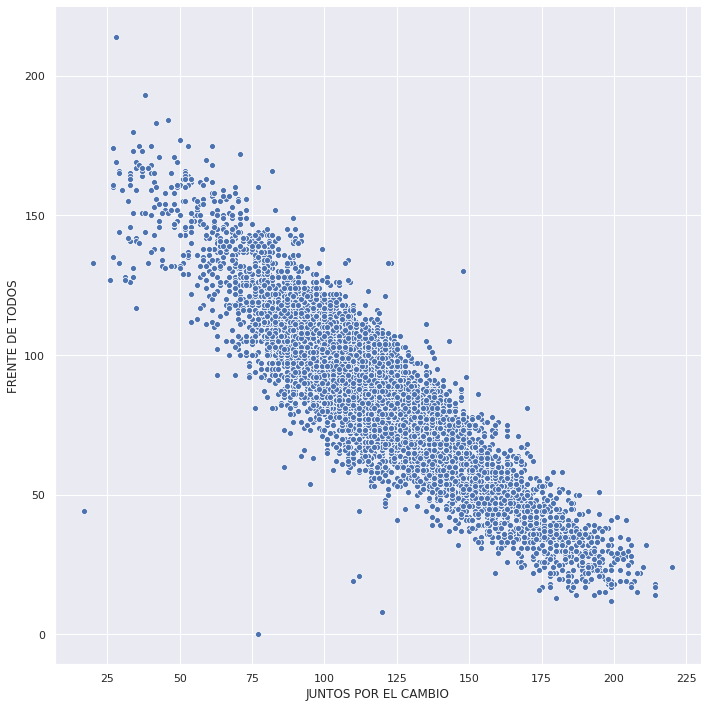

In [10]:
sns.relplot("JUNTOS POR EL CAMBIO","FRENTE DE TODOS",data=df_in,height=10, aspect=1)

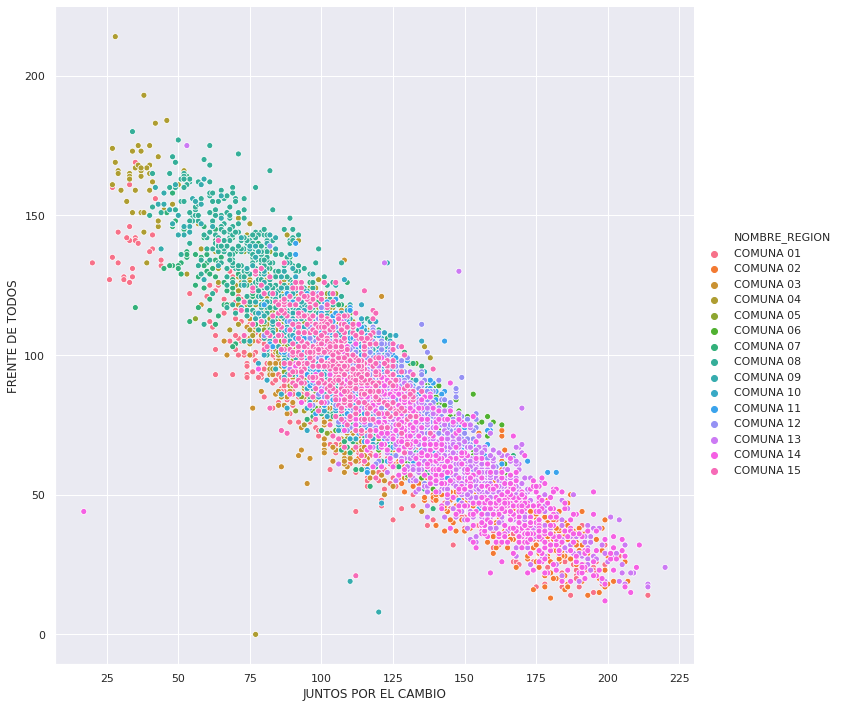

In [11]:
sns.relplot("JUNTOS POR EL CAMBIO","FRENTE DE TODOS",data=df_in,height=10, aspect=1,hue="NOMBRE_REGION")

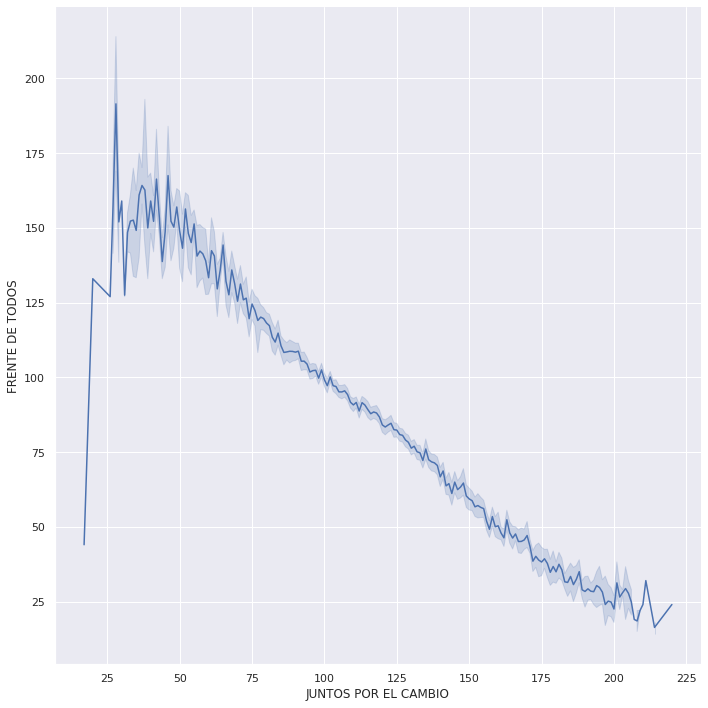

In [12]:
sns.relplot("JUNTOS POR EL CAMBIO","FRENTE DE TODOS",data=df_in,height=10,kind="line");

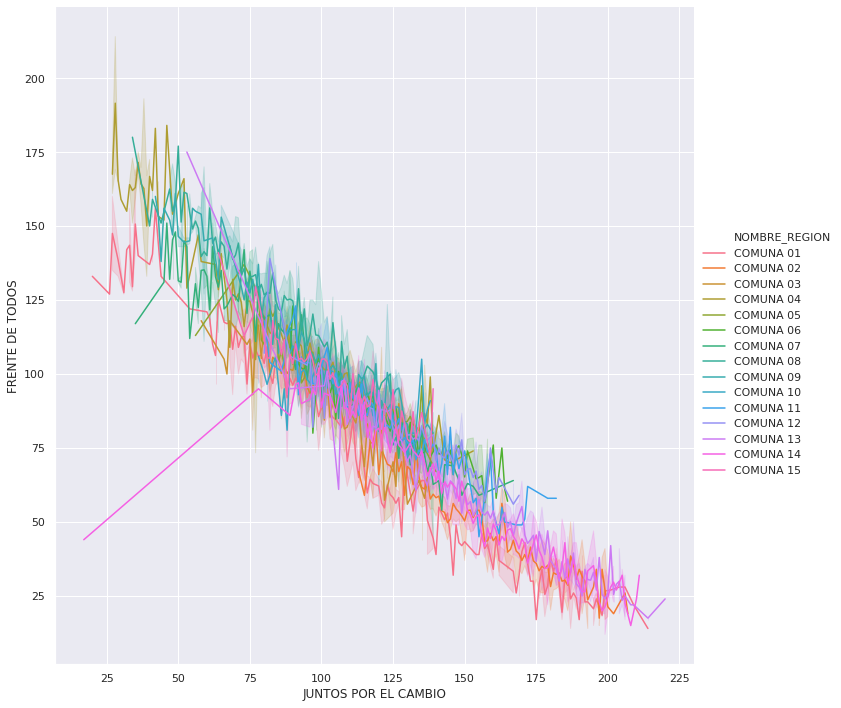

In [13]:
sns.relplot("JUNTOS POR EL CAMBIO","FRENTE DE TODOS",data=df_in,height=10,kind="line",hue="NOMBRE_REGION")

### Gŕaficos Múltiples

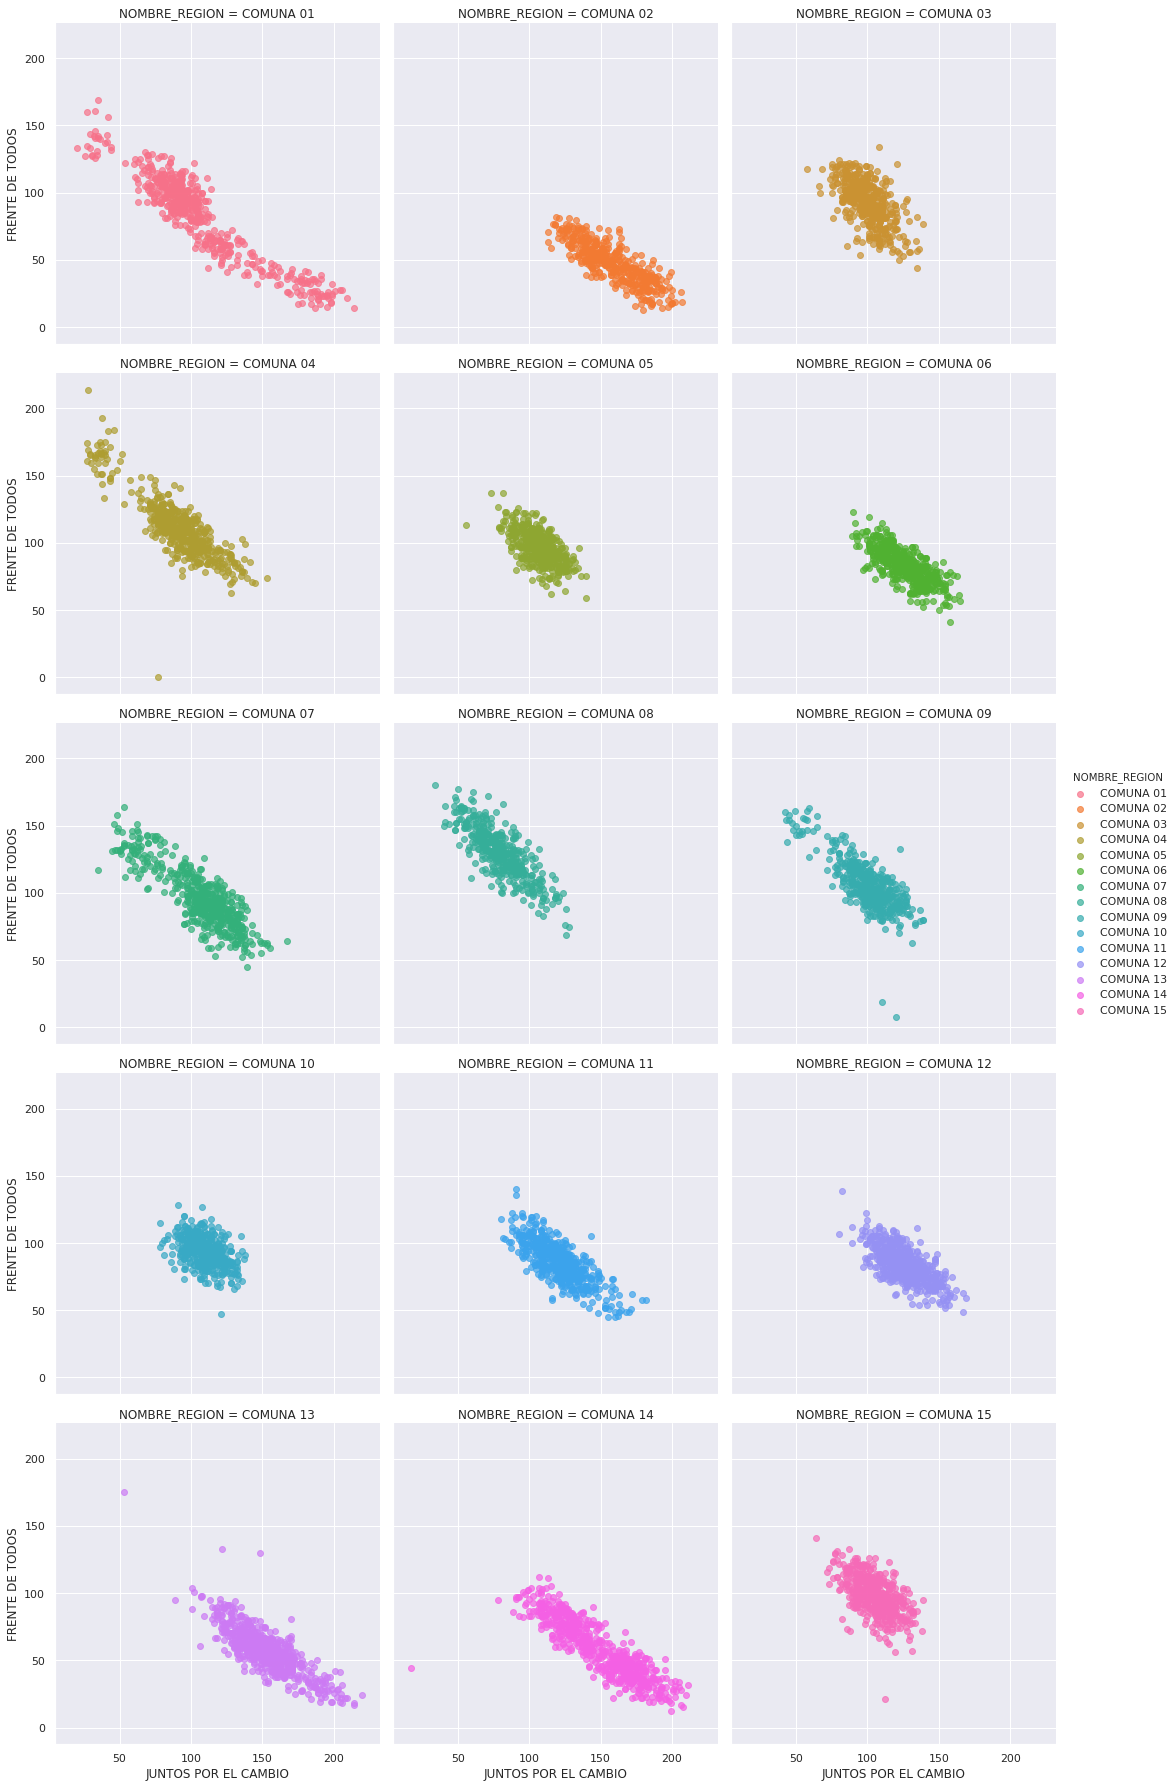

In [14]:
g = sns.FacetGrid(df_in,hue="NOMBRE_REGION",col="NOMBRE_REGION", margin_titles=True,height=5,col_wrap=3)
g.map(plt.scatter, "JUNTOS POR EL CAMBIO","FRENTE DE TODOS", alpha=.7)
g.add_legend();

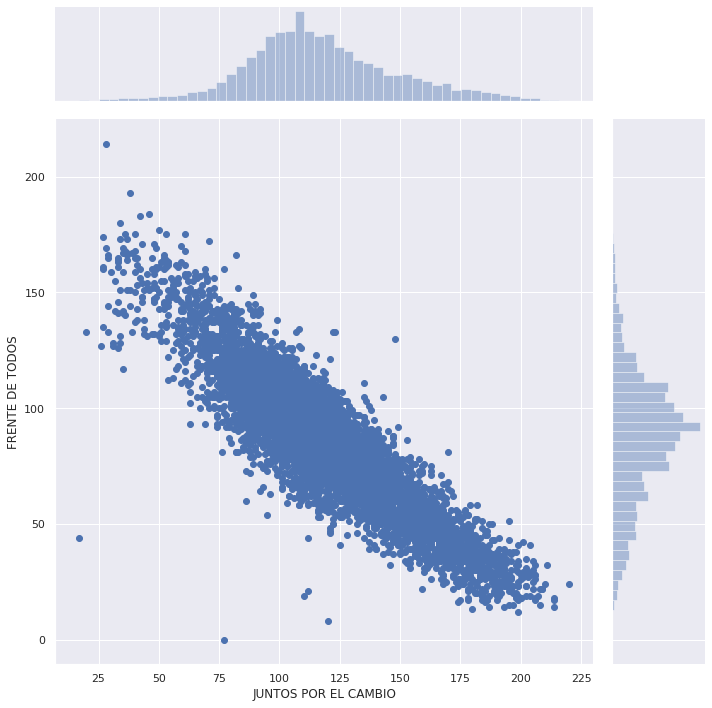

In [15]:
sns.jointplot("JUNTOS POR EL CAMBIO","FRENTE DE TODOS",data=df_in,height=10)

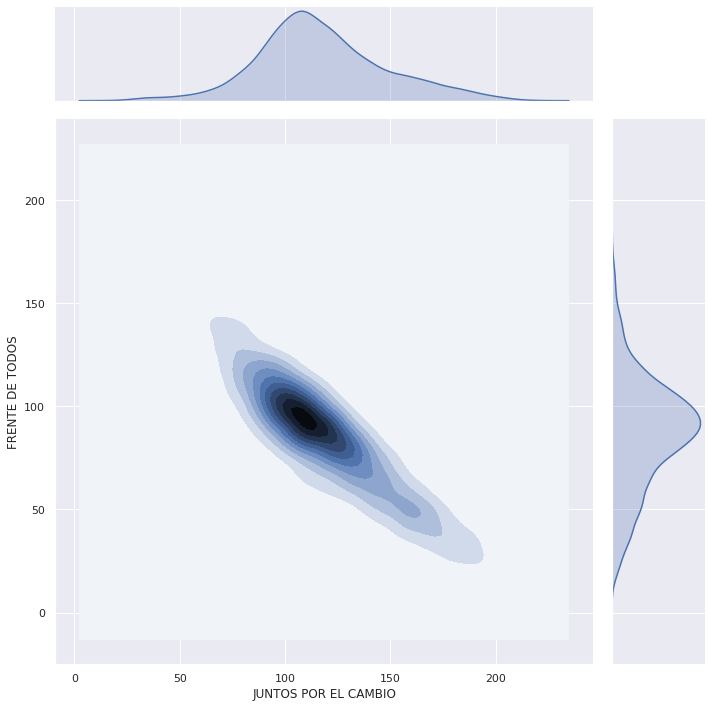

In [16]:
sns.jointplot("JUNTOS POR EL CAMBIO","FRENTE DE TODOS",data=df_in,height=10,kind="kde")

### Gráficos de a Pares

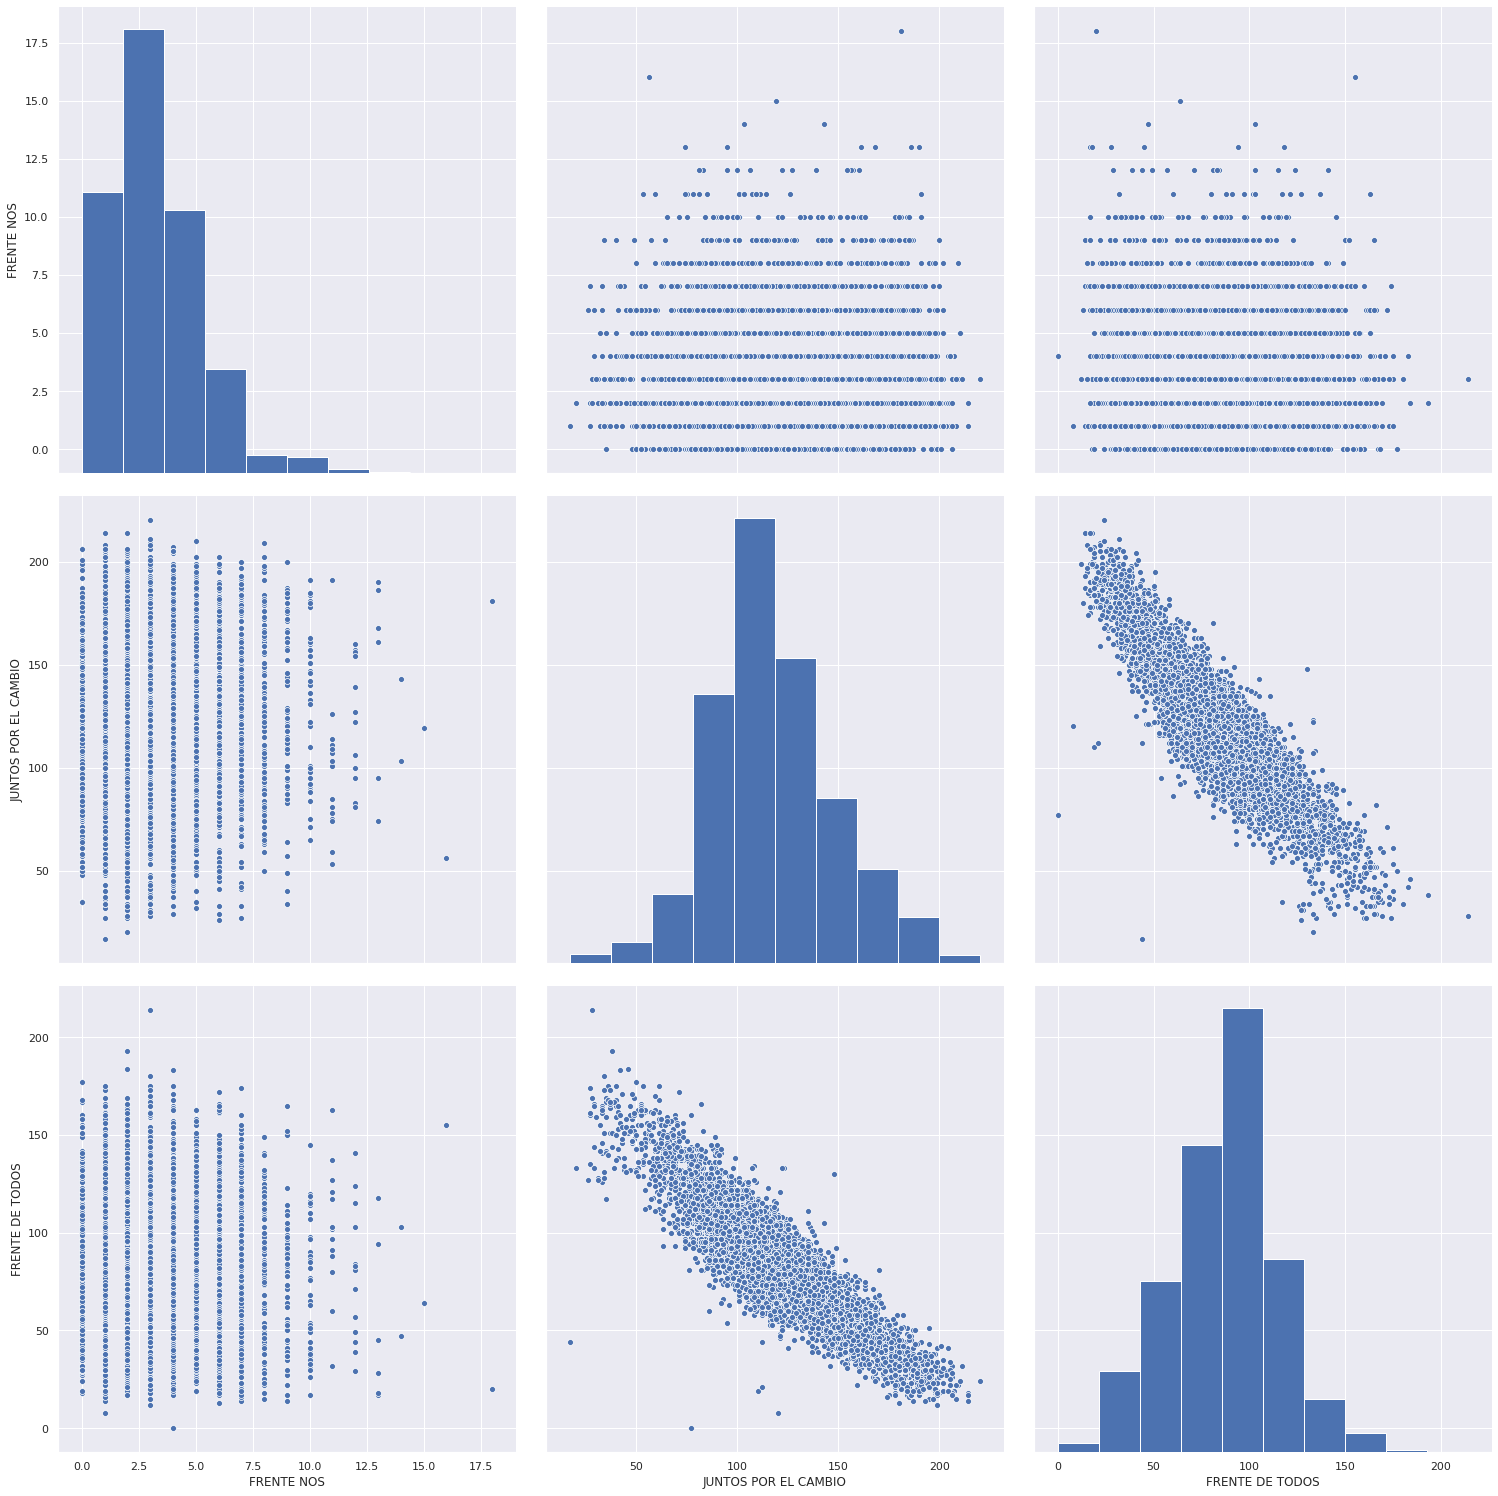

In [17]:
sns.pairplot(df_in[["FRENTE NOS","JUNTOS POR EL CAMBIO","FRENTE DE TODOS"]],height=7);

### HeatMaps

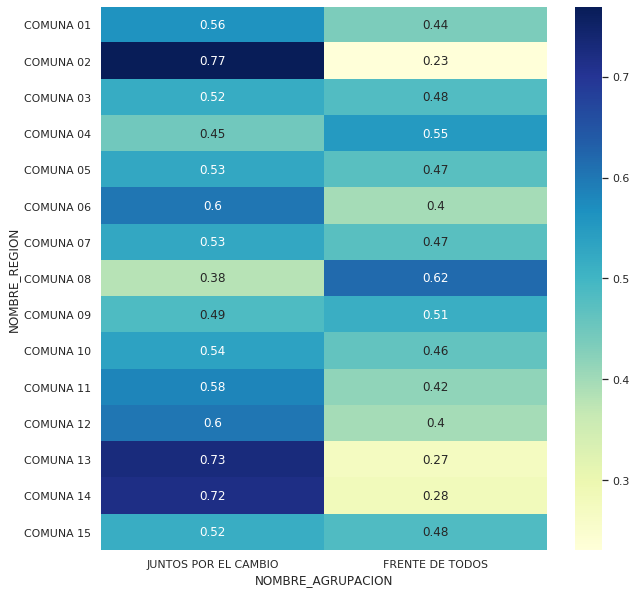

In [18]:
sns.heatmap(df_in
            .filter([ "JUNTOS POR EL CAMBIO","FRENTE DE TODOS","NOMBRE_REGION"])
            .groupby("NOMBRE_REGION")
            .sum()
            .apply(lambda x: (x+0.)/sum(x),1)
            , annot=True
            ,cmap="YlGnBu"
)

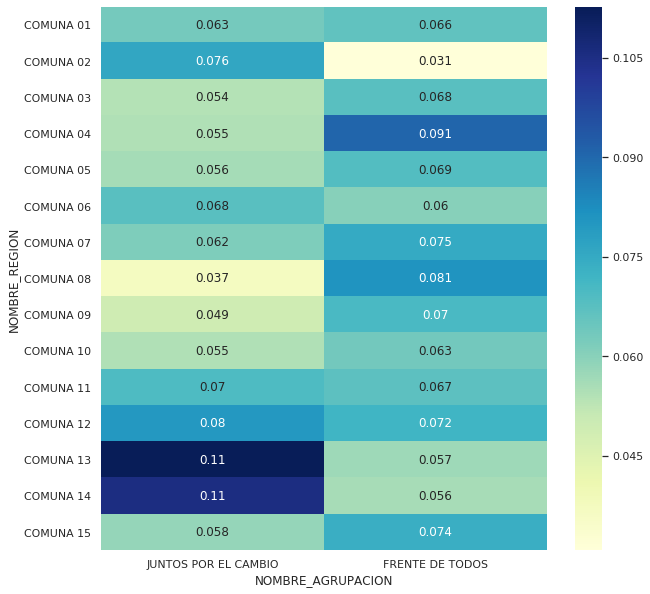

In [19]:
sns.heatmap(df_in
            .filter([ "JUNTOS POR EL CAMBIO","FRENTE DE TODOS","NOMBRE_REGION"])
            .groupby("NOMBRE_REGION")
            .sum()
            .apply(lambda x: (x+0.)/sum(x),0)
            , annot=True
            ,cmap="YlGnBu"
)